In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from datetime import date

report_start = date.fromisoformat('1959-01-01')
report_end = date.today()

In [3]:
m2_cpi = web.get_data_fred(['M2SL', 'CPIAUCSL'], start=report_start, end=report_end)

# Downsampling to quarterly frequency to be consistent with PCE frequency
m2_cpi = m2_cpi.resample('QS').mean()

pce = web.get_data_fred('PCECC96', start=report_start, end=report_end)

m2_pce_cpi = pd.concat([m2_cpi, pce], axis=1)

# Convering to annual percentage change (using U.S. Bureau of Economic Analysis methodology)
# m2_pce_cpi.update((m2_pce_cpi/m2_pce_cpi.shift(1)).pow(4)-1)

# Converting to annual percentage changes (changes from the corresponding quarter a year ago)
m2_pce_cpi.update(m2_pce_cpi.pct_change(4))

m2_pce_cpi = m2_pce_cpi.loc['1960':]


C:\Users\drebi\AppData\Local\Temp\ipykernel_60096\574485371.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  m2_pce_cpi.update(m2_pce_cpi.pct_change(4))


In [4]:
CPI_COLUMN_NAME = 'Annual CPI'
PCE_COLUMN_NAME = 'Real PCE'
m2_pce_cpi.rename(
    columns={'M2SL': 'M2 Annual Percentage Chage', 'CPIAUCSL': CPI_COLUMN_NAME,
             'PCECC96': PCE_COLUMN_NAME},
             inplace=True
)
pd.options.display.float_format = '{:.4%}'.format
m2_pce_cpi

,M2 Annual Percentage Chage,Annual CPI,Real PCE
DATE,,,
1960-01-01,3.7522%,1.3911%,3.7035%
1960-04-01,3.0694%,1.8249%,3.4145%
1960-07-01,3.5011%,1.3588%,1.9362%
1960-10-01,4.6444%,1.3960%,1.9534%
1961-01-01,5.9158%,1.5081%,0.9498%
...,...,...,...
2023-01-01,-2.5313%,5.7498%,2.1182%
2023-04-01,-4.1037%,4.0316%,1.8208%
2023-07-01,-3.8748%,3.5618%,2.2078%


In [5]:
GRAPH_TITLE = 'US Annual Percentage Change in M2, Real PCE, and CPI from %d' % m2_pce_cpi.index[0].year
LABEL_MEAN_M2_PCE_CPI = 'Mean Level of Annual Changes in M2, PCE, and CPI'

In [6]:
# Mean level of M2, PCE, and CPI
mean_level_m2_pce_cpi = m2_pce_cpi.mean().mean()

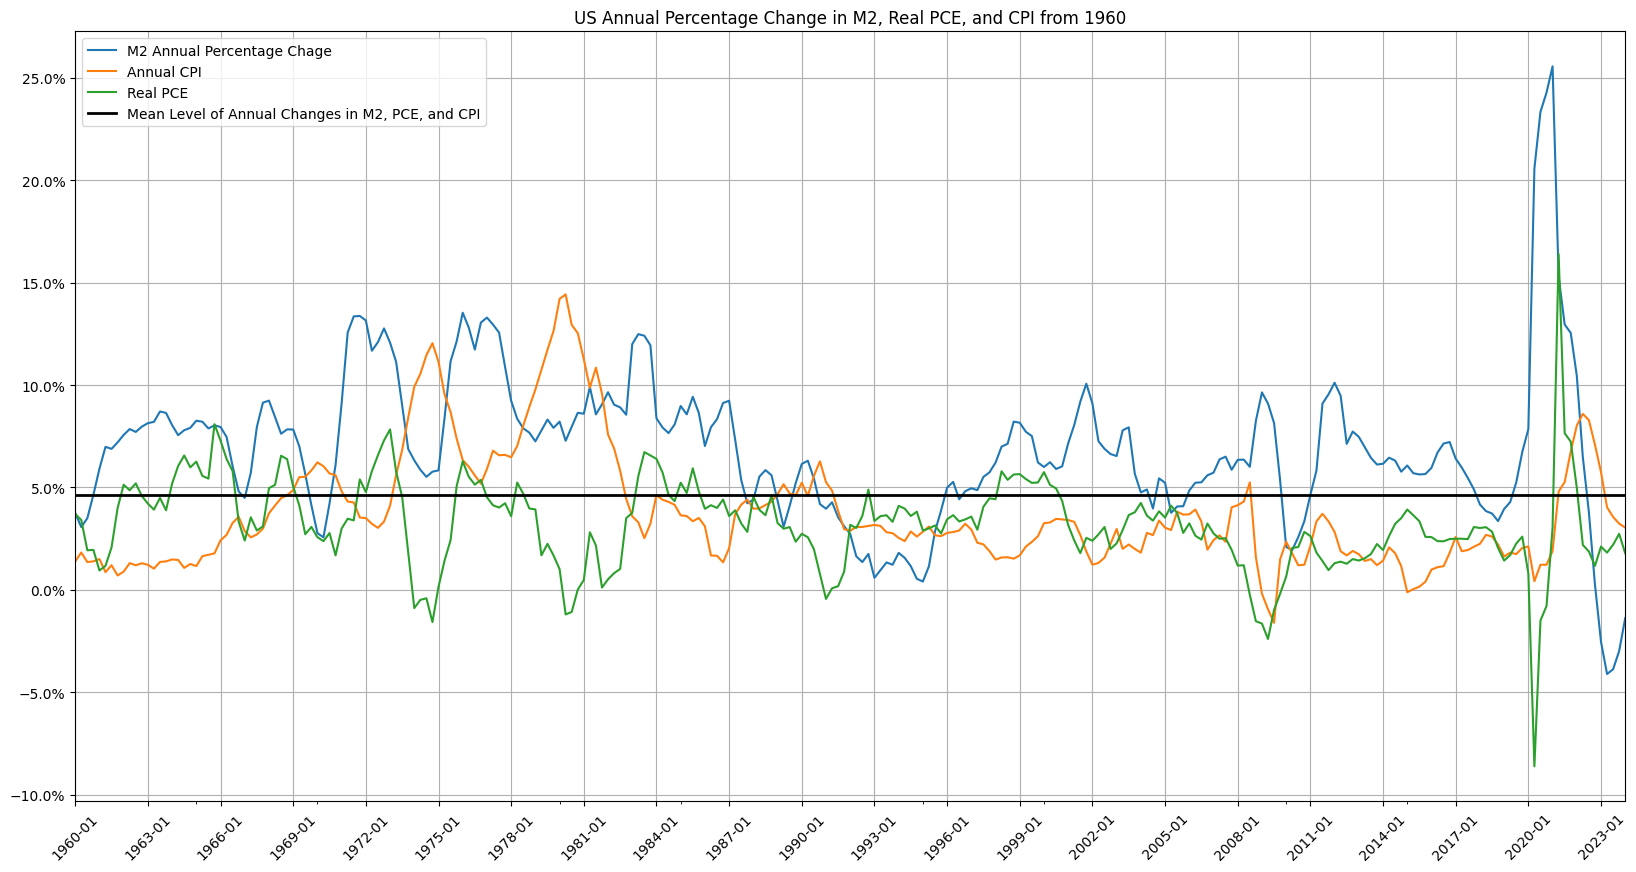

In [7]:
ax = m2_pce_cpi.plot(figsize=(20,10), grid=True, title=GRAPH_TITLE,
                     xticks=m2_pce_cpi.index[::12], xlabel='', rot=45)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=mean_level_m2_pce_cpi, lw=2, c='k', label=LABEL_MEAN_M2_PCE_CPI)
ax.legend()
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, m2_pce_cpi.index[::12])))


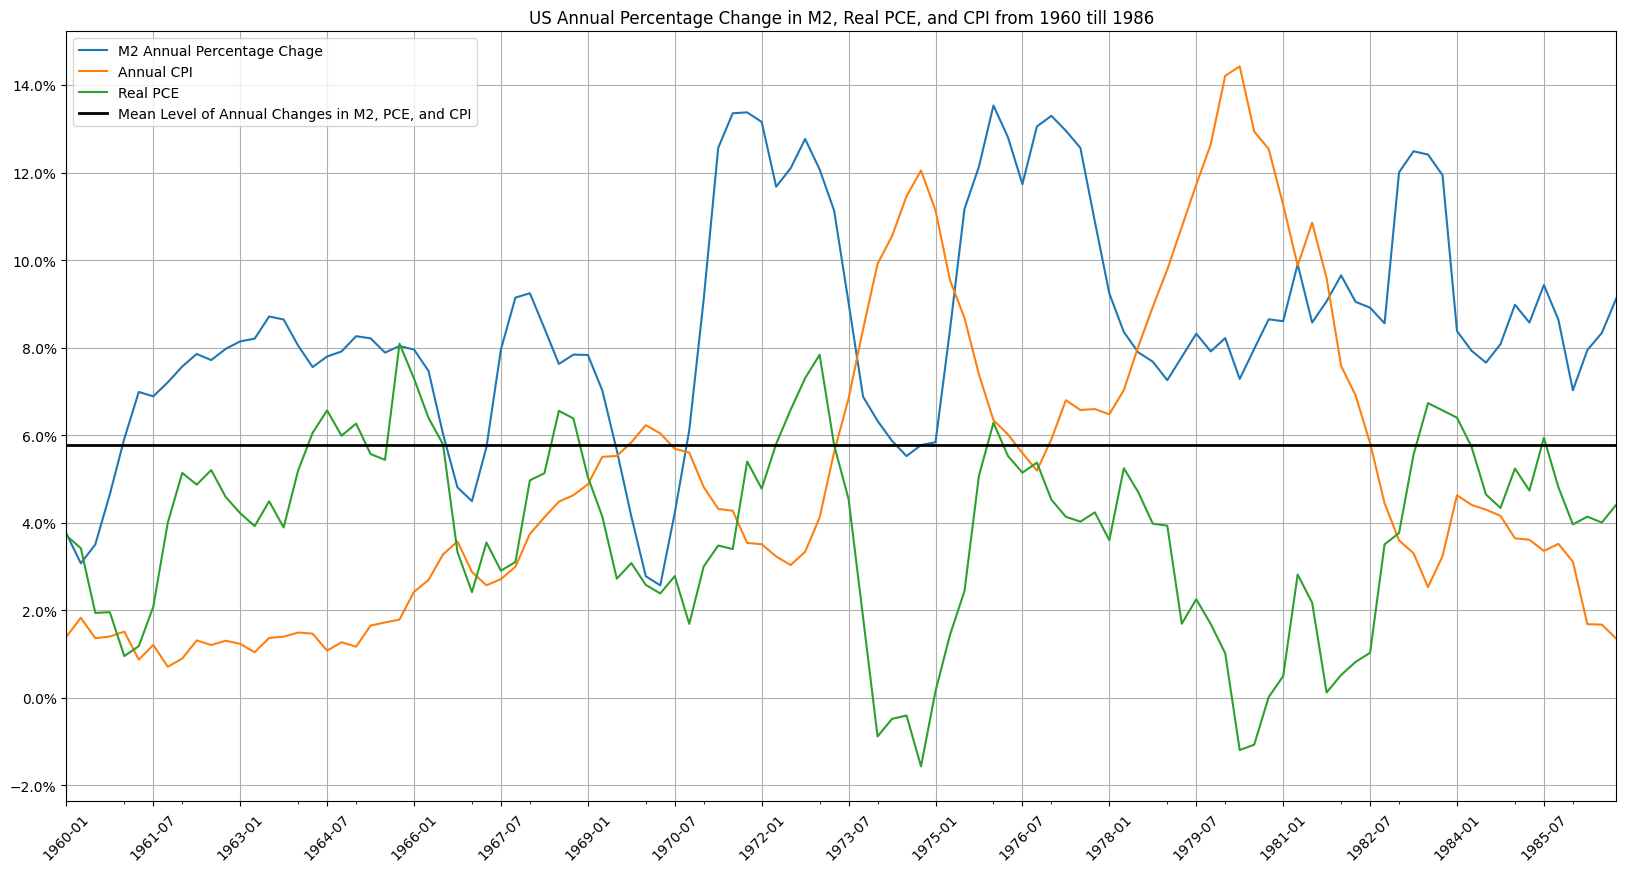

In [8]:
m2_pce_cpi_85 = m2_pce_cpi.loc[:'1986']
mean_level_m2_pce_cpi_85 = m2_pce_cpi_85.mean().mean()
ax = m2_pce_cpi_85.plot(figsize=(20,10), grid=True,
                        title=GRAPH_TITLE + ' till ' + m2_pce_cpi_85.index[-1].strftime('%Y'),
                        xticks=m2_pce_cpi_85.index[::6], xlabel='', rot=45)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=mean_level_m2_pce_cpi_85, lw=2, c='k', label=LABEL_MEAN_M2_PCE_CPI)
ax.legend()
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, m2_pce_cpi_85.index[::6])))

In [9]:
pd.options.display.float_format = None
m2_pce_cpi_85.corr()

,M2 Annual Percentage Chage,Annual CPI,Real PCE
M2 Annual Percentage Chage,1.000000,0.006468,0.398802
Annual CPI,0.006468,1.000000,-0.625815
Real PCE,0.398802,-0.625815,1.000000


In [10]:
pce = m2_pce_cpi_85.loc[:, PCE_COLUMN_NAME]
m2_pce_cpi_85.iloc[:, :2].corrwith(pce.shift(-1))

M2 Annual Percentage Chage    0.465302
Annual CPI                   -0.656019
dtype: float64

In [11]:
cpi = m2_pce_cpi_85.loc[:,CPI_COLUMN_NAME]
m2 = m2_pce_cpi_85.iloc[:,0]
m2.corr(cpi.shift(-11))


0.548173515419726

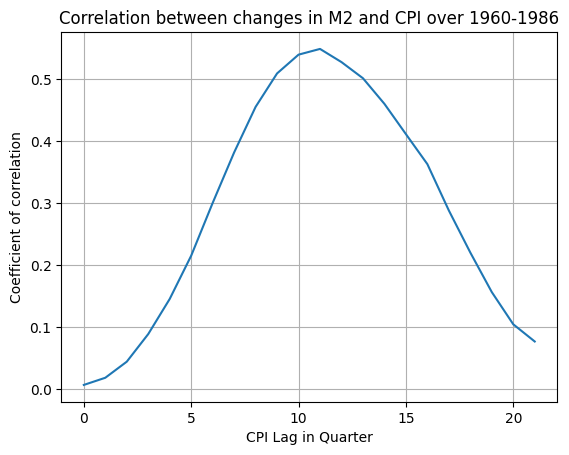

In [12]:
idx=pd.Index(range(22), name='CPI Lag in Quarter')
effect_of_M2_shrinking=pd.Series(idx.map(lambda lag: m2.corr(cpi.shift(-lag))), index=idx)
_ = effect_of_M2_shrinking.plot(grid=True, title='Correlation between changes in M2 and CPI over %d-%d' % (m2.index[0].year, m2.index[-1].year),
                                ylabel='Coefficient of correlation')

                                

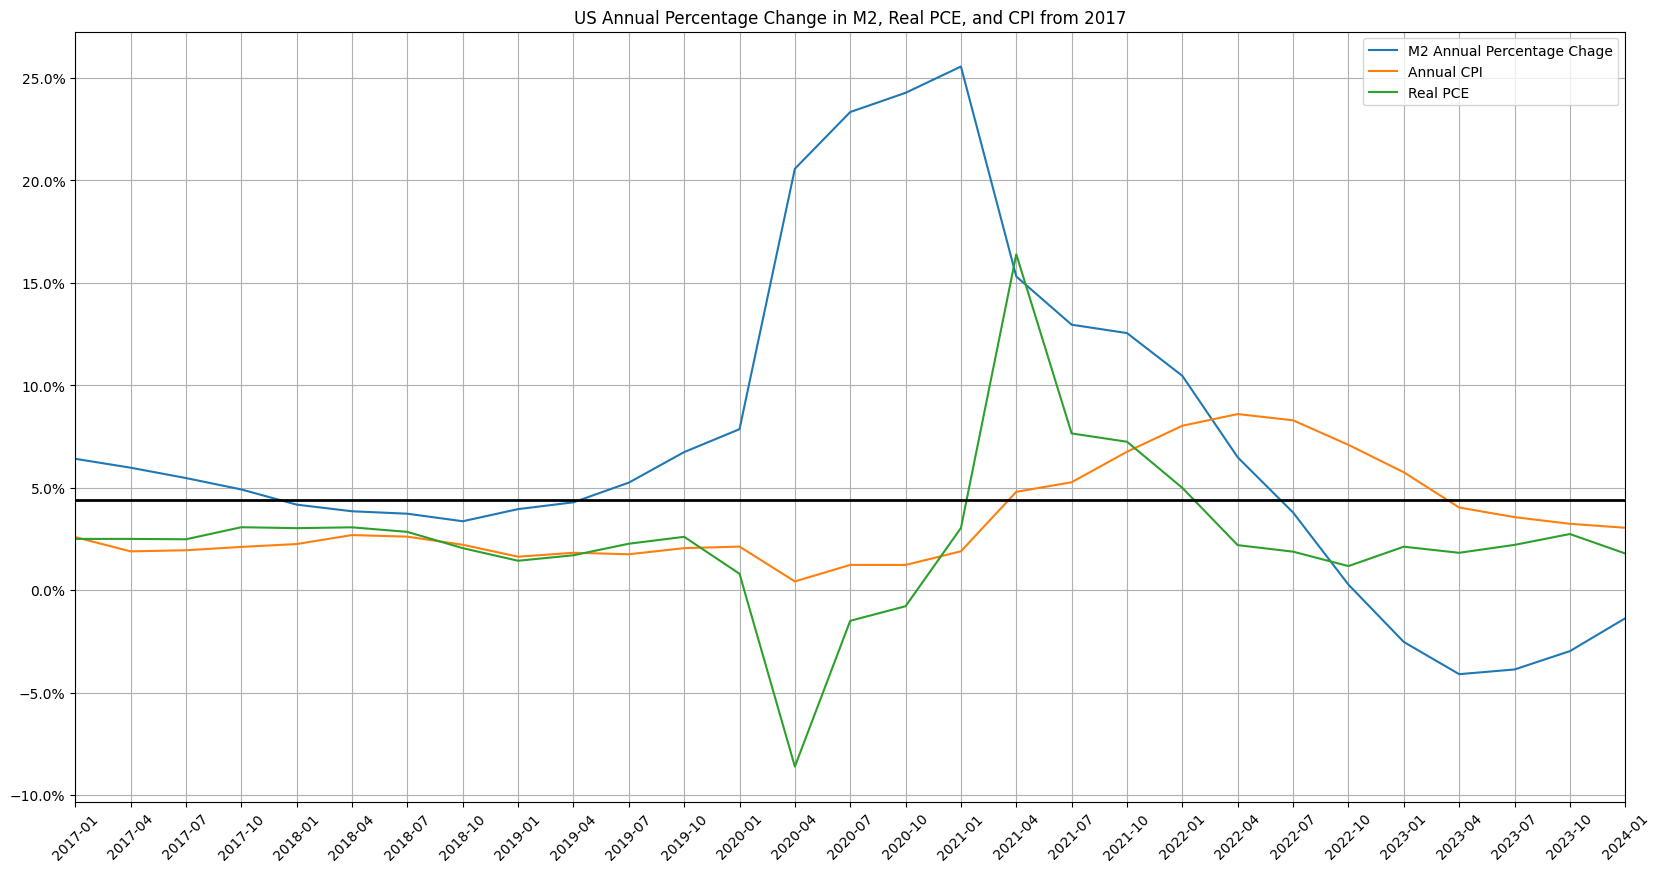

In [14]:
m2_pce_cpi_2017 = m2_pce_cpi.loc['2017':]
mean_level_m2_pce_cpi_2017 = m2_pce_cpi_2017.mean().mean()
ax = m2_pce_cpi_2017.plot(figsize=(20,10), grid=True,
                          title='US Annual Percentage Change in M2, Real PCE, and CPI from %d' % m2_pce_cpi_2017.index[0].year,
                          xticks=m2_pce_cpi_2017.index[::], xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=mean_level_m2_pce_cpi_2017, lw=2, c='k', label=LABEL_MEAN_M2_PCE_CPI)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, m2_pce_cpi_2017.index[::])))

In [15]:
pcepi_cpi = web.get_data_fred(['PCEPI', 'CPIAUCSL'], start=report_start, end=report_end)

# Converting to annual percentage changes(changes from the corresponding month a year ago)
pcepi_cpi.update(pcepi_cpi.pct_change(12))
pcepi_cpi = pcepi_cpi.loc['2003':]

In [18]:
GRAPH_TITLE_PCE_CPI = 'US Annual Percentage Changes in Personal Consumption Expenditures Price Index (PCEPI)'\
                      ' and Consumer Price Index (CPI)'

pcepi_cpi.rename(
    columns={'CPIAUCSL':'Annual seasonaly adjusted CPI',
            'PCEPI': 'Annual seasonaly adjusted PCEPI'},
    inplace=True
)

In [20]:
pd.options.display.float_format = '{:.4%}'.format
pd.options.display.max_rows = 20
pcepi_cpi.loc['2020-01':]

,Annual seasonaly adjusted PCEPI,Annual seasonaly adjusted CPI
DATE,,
2020-01-01,1.6979%,2.5123%
2020-02-01,1.6420%,2.3397%
2020-03-01,1.1469%,1.5231%
2020-04-01,0.4111%,0.3499%
2020-05-01,0.4486%,0.2162%
...,...,...
2023-10-01,2.9421%,3.2458%
2023-11-01,2.7027%,3.1395%
2023-12-01,2.6194%,3.3232%


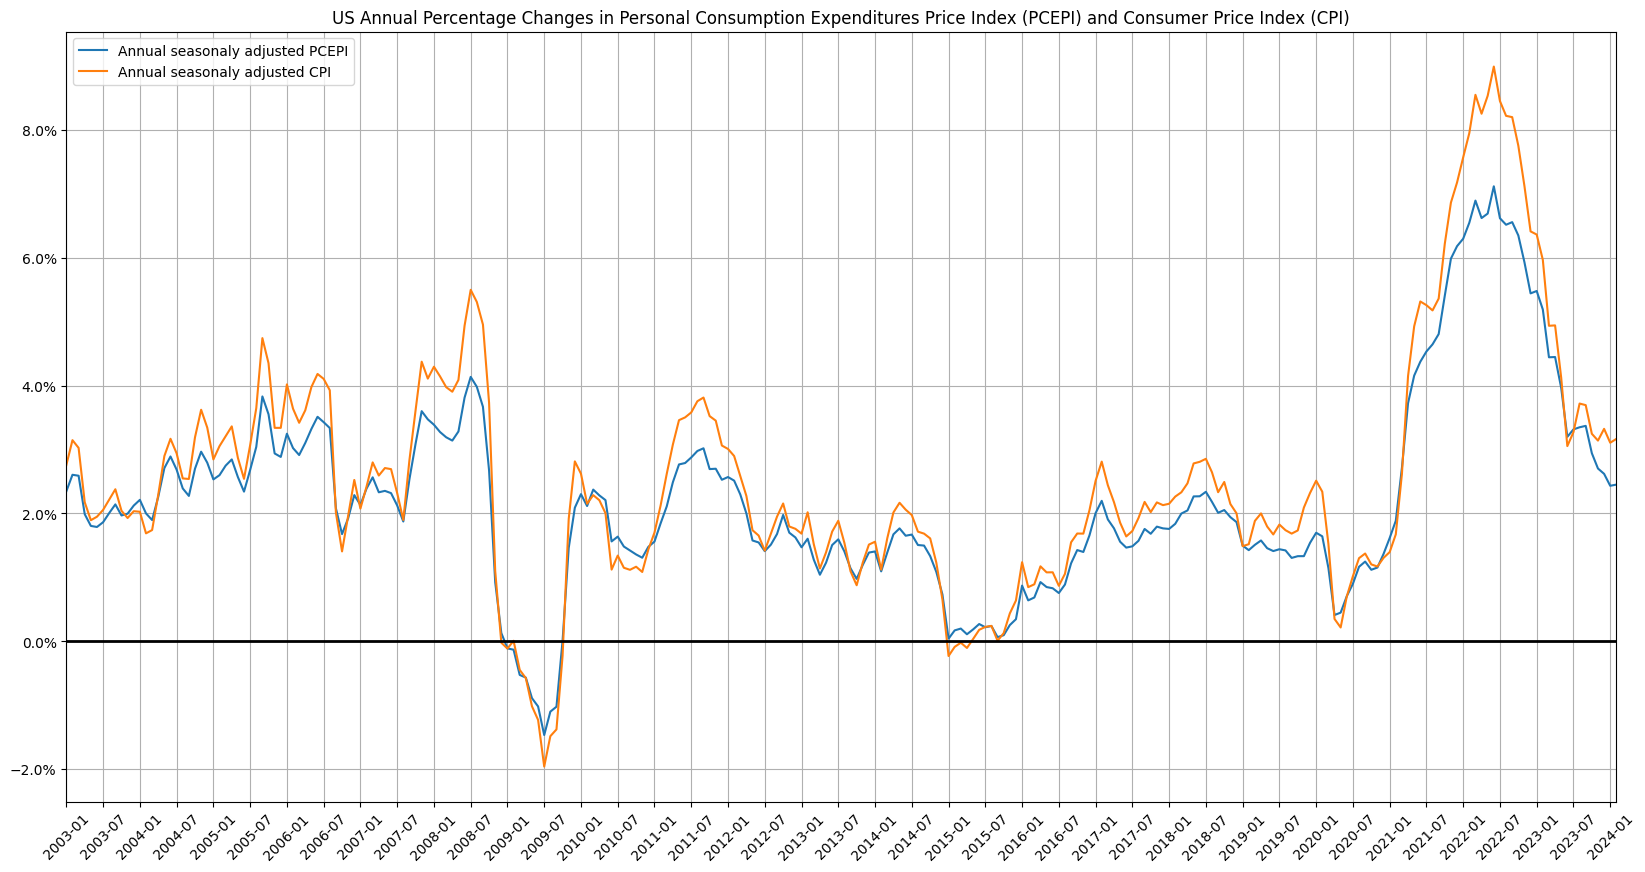

In [21]:
ax = pcepi_cpi.plot(figsize=(20,10), grid=True,
                    title=GRAPH_TITLE_PCE_CPI,
                    xticks=pcepi_cpi.index[::6], xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.axhline(y=0, lw=2, c='k')
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, pcepi_cpi.index[::6])))